# Kappa model Causal Petri net

Laurent, J., Yang, J., & Fontana, W. (2018). [Counterfactual resimulation for causal analysis of rule-based models](https://dl.acm.org/doi/abs/10.5555/3304889.3304920)  *Proceedings of the 27th International Joint Conference on Artificial Intelligence*. IJCAI’18.

Models based on rules that express local and heterogeneous mechanisms of stochastic interactions between structured agents are an important tool for investigating the dynamical behavior of complex systems, especially in molecular biology. Given a simulated trace of events, the challenge is to construct a causal diagram that explains how a phenomenon of interest occurred. Counterfactual analysis can provide distinctive insights, but its standard definition is not applicable in rule-based models because they are not readily expressible in terms of structural equations. We provide a semantics of counterfactual statements that addresses this challenge by sampling counterfactual trajectories that are probabilistically as close to the factual trace as a given intervention permits them to be. We then show how counterfactual dependencies give rise to explanations in terms of relations of enablement and prevention between events.


![KappaStates.png](../images/ToyModel.png)



In [2]:
import snakes.plugins
nets = snakes.plugins.load('gv', 'snakes.nets', 'nets')
from nets import (Place, PetriNet, Transition, MultiSet, 
                  Expression, Marking, OneOf, Substitution, 
                  Test, Tuple, Variable,Value)
from IPython.display import Image

In [9]:
def independent_choice_Kappa_petri_net_full_state_per_node(t=7):
    n = PetriNet("Kappa")
    # State Nodes               # (value, probability)
    for i in range(t):
        n.add_place(Place(f"S{i}=u, K{i}=u, bind{i}=0"))
        n.add_place(Place(f"S{i}=u, K{i}=u, bind{i}=1"))
        n.add_place(Place(f"S{i}=u, K{i}=p, bind{i}=0"))
        n.add_place(Place(f"S{i}=u, K{i}=p, bind{i}=1"))
        n.add_place(Place(f"S{i}=p, K{i}=u, bind{i}=0"))
        n.add_place(Place(f"S{i}=p, K{i}=u, bind{i}=1"))
        n.add_place(Place(f"S{i}=u, K{i}=p, bind{i}=0"))
        n.add_place(Place(f"S{i}=u, K{i}=p, bind{i}=1"))

    # Decision Nodes
    for i in range(0,t-1):
        n.add_transition(Transition(f'Rule{i}=pK' ))
        n.add_transition(Transition(f'Rule{i}=b' ))
        n.add_transition(Transition(f'Rule{i}=pS' ))
        n.add_transition(Transition(f'Rule{i}=u_fast' ))
        n.add_transition(Transition(f'Rule{i}=u_slow' ))
    
    # Arcs from States to Decisions
    for i in range(t-1):
        n.add_input(f"K{i}=u", f"Rule{i}=pK", Value(1))
        n.add_input(f"S{i}=u", f"Rule{i}=pS", Value(1))
        n.add_input(f"bind{i}=1", f"Rule{i}=pS", Value(1))
        

        n.add_input(f"bind{i}=1", f"Rule{i}=u_slow", Value(1))
        n.add_input(f"K{i}=p", f"Rule{i}=u_slow", Value(1))
        n.add_input(f"bind{i}=1", f"Rule{i}=u_fast", Value(1))
        n.add_input(f"K{i}=u", f"Rule{i}=u_fast", Value(1))
        n.add_input(f"bind{i}=0", f"Rule{i}=b", Value(1))

    
    # Arcs from Decisions to States have a weight that sums to one.
    for i in range(t-1):
        n.add_output(f"K{i+1}=p", f"Rule{i}=pK", Value(1))
        n.add_output(f"S{i+1}=p", f"Rule{i}=pS", Value(1))
        n.add_output(f"bind{i+1}=0", f"Rule{i}=u_slow", Value(1))
        n.add_output(f"bind{i+1}=0", f"Rule{i}=u_fast", Value(1))
        n.add_output(f"bind{i+1}=1", f"Rule{i}=b", Value(1))

    return n

In [10]:
def independent_choice_Kappa_petri_net_single_variable_state_per_node(t=7):
    n = PetriNet("Kappa")
    # State Nodes               # (value, probability)
    for i in range(t):
        n.add_place(Place(f"S{i}=u"))
        n.add_place(Place(f"S{i}=p"))
        n.add_place(Place(f"K{i}=u"))
        n.add_place(Place(f"K{i}=p"))
        n.add_place(Place(f"bind{i}=0"))
        n.add_place(Place(f"bind{i}=1"))
    # Decision Nodes
    for i in range(0,t-1):
        n.add_transition(Transition(f'Rule{i}=pK' ))
        n.add_transition(Transition(f'Rule{i}=b' ))
        n.add_transition(Transition(f'Rule{i}=pS' ))
        n.add_transition(Transition(f'Rule{i}=u_fast' ))
        n.add_transition(Transition(f'Rule{i}=u_slow' ))
    
    # Arcs from States to Decisions
    for i in range(t-1):
        n.add_input(f"K{i}=u", f"Rule{i}=pK", Value(1))
        n.add_input(f"S{i}=u", f"Rule{i}=pS", Value(1))
        n.add_input(f"bind{i}=1", f"Rule{i}=pS", Value(1))
        

        n.add_input(f"bind{i}=1", f"Rule{i}=u_slow", Value(1))
        n.add_input(f"K{i}=p", f"Rule{i}=u_slow", Value(1))
        n.add_input(f"bind{i}=1", f"Rule{i}=u_fast", Value(1))
        n.add_input(f"K{i}=u", f"Rule{i}=u_fast", Value(1))
        n.add_input(f"bind{i}=0", f"Rule{i}=b", Value(1))

    
    # Arcs from Decisions to States have a weight that sums to one.
    for i in range(t-1):
        n.add_output(f"K{i+1}=p", f"Rule{i}=pK", Value(1))
        n.add_output(f"S{i+1}=p", f"Rule{i}=pS", Value(1))
        n.add_output(f"bind{i+1}=0", f"Rule{i}=u_slow", Value(1))
        n.add_output(f"bind{i+1}=0", f"Rule{i}=u_fast", Value(1))
        n.add_output(f"bind{i+1}=1", f"Rule{i}=b", Value(1))

    return n

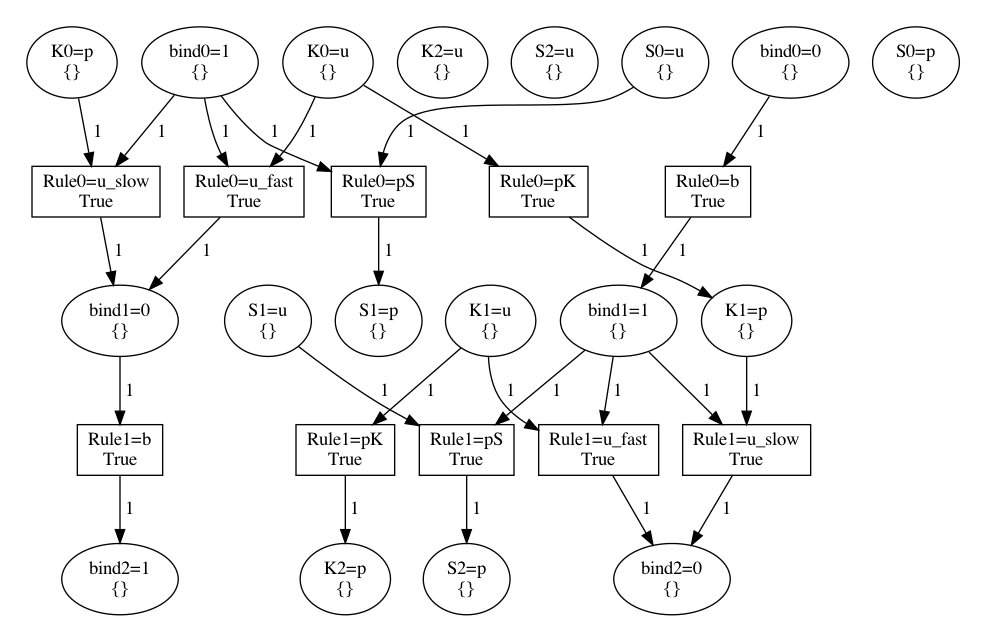

In [11]:
kappa = independent_choice_Kappa_petri_net_single_variable_state_per_node(t=3)
kappa.draw('Kappa_independent_choice_semantics_pnet.png')
Image('Kappa_independent_choice_semantics_pnet.png')

In [3]:
import sys
sys.path.append('../src')
from probability_trees import MinCut, PTree, Critical, PDF


def KappaModel( bvars, b = 1,
                      u = 17,
                      u_star = 2,
                      pS = 2,
                      pK = 1, 
                      tmax=6,
                      semantics='trace'):
    
    t=0
    if 'Rule0' not in bvars:
        return init( t )
    while f'Rule{t}' in bvars:
        t += 1
    if t <= tmax:
        return apply_rules( bvars, t, b, u, u_star, pS , pK, semantics )
    else:
        return None   

def init( t):
    return f'Rule{t}=init, bind{t}=0, S{t}=u, K{t}=u'

def apply_rules( bvar, t, b, u, u_star, pS, pK, semantics='trace' ):
    prob_state = []
    prob_state.append( binding( bvar, b, t ) )
    prob_state.append(fast_unbinding(bvar, u, t ) )
    prob_state.append( slow_unbinding( bvar, u_star, t ) )
    prob_state.append(substrate_phosphorylation( bvar, pS, t))
    prob_state.append( kinase_phosphorylation( bvar, pK, t))
    total_prob = sum([prob for prob, state in prob_state])
    if semantics=='trace':
        return [(prob/total_prob, state) 
                for prob, state in prob_state
                if prob > 0]
    else:
        return [(prob/total_prob, state) 
                for prob, state in prob_state]


def binding( bvar, b, t ):
    bind, S, K = bvar[f'bind{t-1}'], bvar[f'S{t-1}'], bvar[f'K{t-1}']
    if bind == '0':
        return b, f'Rule{t}=b, bind{t}=1, S{t}={S}, K{t}={K}'
    else:
        return 0, f'Rule{t}=b, bind{t}={bind}, S{t}={S}, K{t}={K}'

def fast_unbinding( bvar, u, t):
    bind, S, K = bvar[f'bind{t-1}'], bvar[f'S{t-1}'], bvar[f'K{t-1}']
    if bind == '1' and K == 'u':
        return u, f'Rule{t}=u, bind{t}=0, S{t}={S}, K{t}={K}'
    else:
        return 0, f'Rule{t}=u, bind{t}={bind}, S{t}={S}, K{t}={K}'
    
def slow_unbinding( bvar, u_star, t):
    bind, S, K = bvar[f'bind{t-1}'], bvar[f'S{t-1}'], bvar[f'K{t-1}']
    if bind == '1' and K == 'p':
        return u_star, f'Rule{t}=u_star, bind{t}=0, S{t}={S}, K{t}={K}'
    else:
        return 0, f'Rule{t}=u_star, bind{t}={bind}, S{t}={S}, K{t}={K}'

def substrate_phosphorylation( bvar, pS, t ):
    bind, S, K = bvar[f'bind{t-1}'], bvar[f'S{t-1}'], bvar[f'K{t-1}']
    if bind == '1' and S == 'u':
        return pS, f'Rule{t}=pS, bind{t}={bind}, S{t}=p, K{t}={K}'
    else:
        return 0, f'Rule{t}=pS, bind{t}={bind}, S{t}={S}, K{t}={K}'
    
def kinase_phosphorylation( bvar, pK, t ):
    bind, S, K = bvar[f'bind{t-1}'], bvar[f'S{t-1}'], bvar[f'K{t-1}']
    if K == 'u':
        return pK, f'Rule{t}=pK, bind{t}={bind}, S{t}={S}, K{t}=p'
    else:
        return 0, f'Rule{t}=pK, bind{t}={bind}, S{t}={S}, K{t}={K}'


    

# Unconditioned tree

![uncondititioned](../images/unconditionedtree.png)

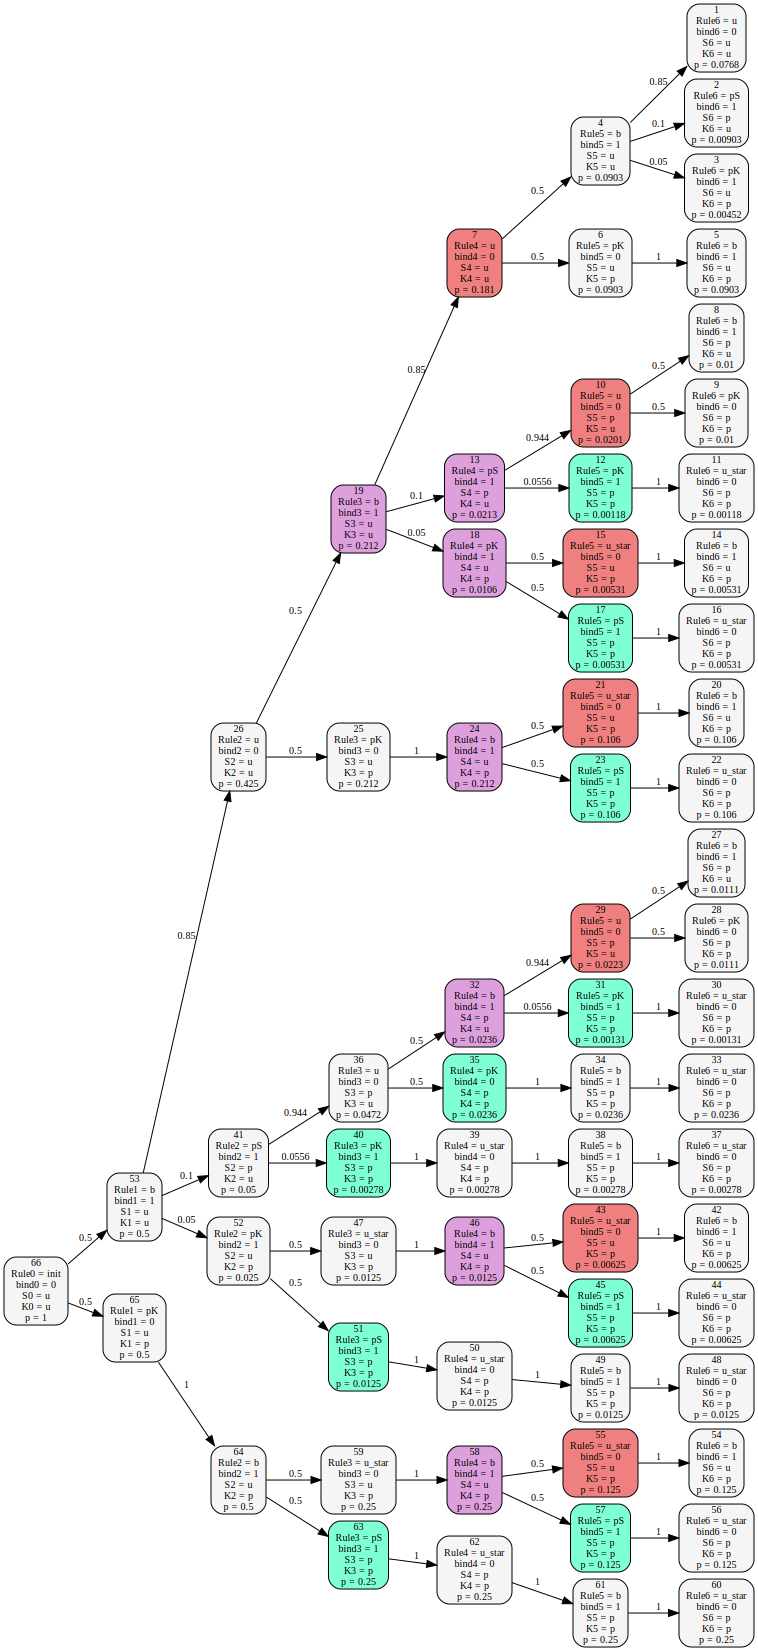

In [4]:
kappa = PTree.fromFunc(KappaModel, init( 0 ))
display(kappa.show(show_prob=True,
            cut=kappa.prop('Rule6=u_star'),
                crit=kappa.critical(kappa.prop('Rule6=u_star')),
                show_id=True
               ))

# Factual trace

![Factual trace](../images/FactualTrace.png)

In [5]:
b1, u2, pK3, b4, pS5, u_star6 = (kappa.prop('Rule1=b'), 
                          kappa.prop('Rule2=u'), 
                          kappa.prop('Rule3=pK'),
                          kappa.prop('Rule4=b'),
                          kappa.prop('Rule5=pS'),
                          kappa.prop('Rule6=u_star'))
factual_trace = kappa.see(b1 & u2 & pK3 & b4 & pS5 & u_star6)



## Enablement graph




![Enablement graph](../images/Enablement-graph.png)




## Factual tree

![factual](../images/factualtree.png)

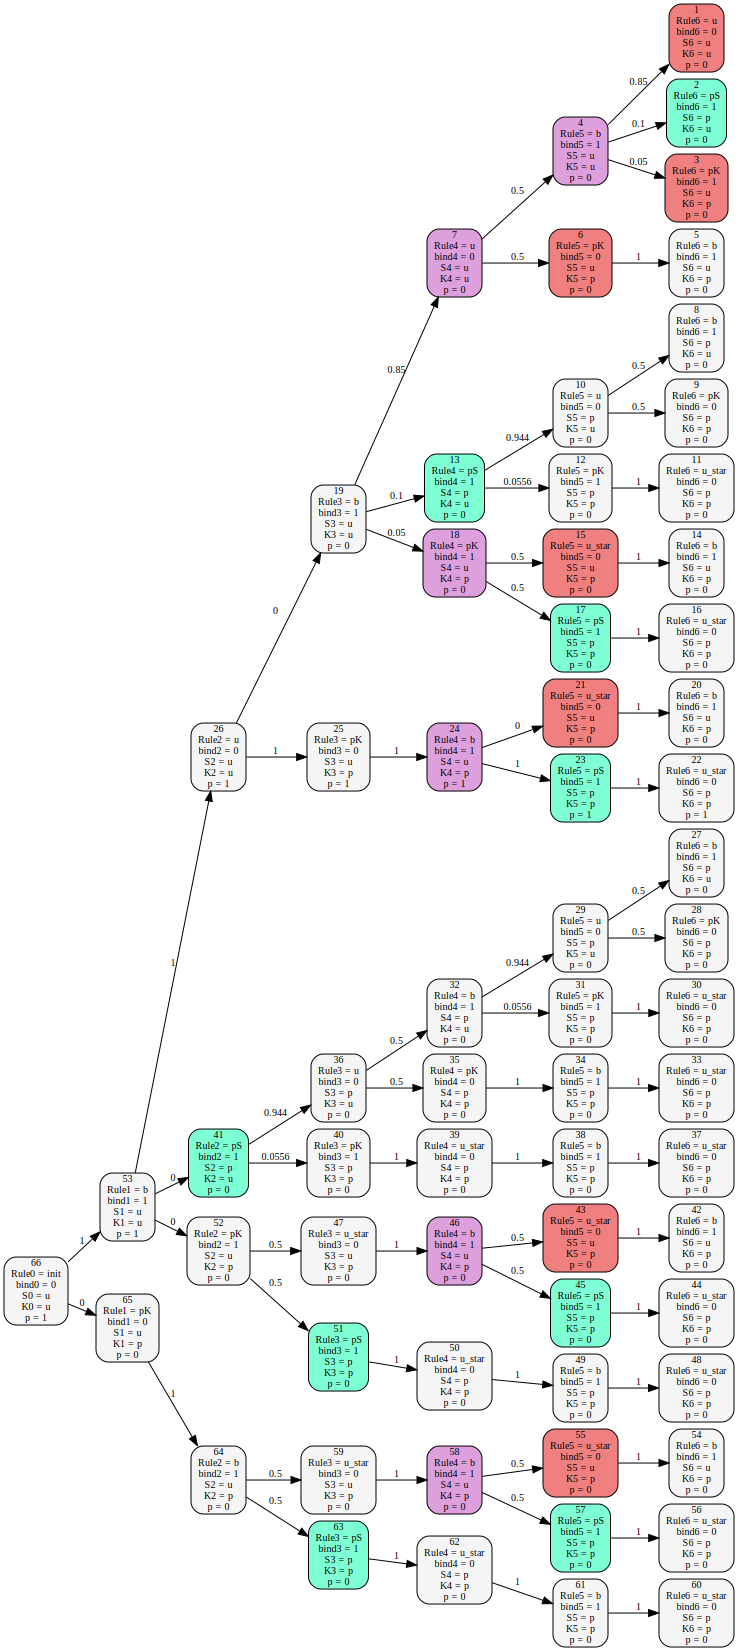

In [6]:

init_enables_b = ((kappa.prop('Rule0=init') < kappa.prop('Rule1=b')) | 
                  (kappa.prop('Rule0=init') < kappa.prop('Rule2=b')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule3=b')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule4=b')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule5=b')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule6=b')))

b1_enables_pS = ((kappa.prop('Rule1=b') < kappa.prop('Rule2=pS'))| 
                 (kappa.prop('Rule1=b') < kappa.prop('Rule3=pS')) | 
                 (kappa.prop('Rule1=b') < kappa.prop('Rule4=pS')) | 
                 (kappa.prop('Rule1=b') < kappa.prop('Rule5=pS')) | 
                 (kappa.prop('Rule1=b') < kappa.prop('Rule6=pS')))
b2_enables_pS =  ((kappa.prop('Rule2=b') < kappa.prop('Rule3=pS')) | 
                 (kappa.prop('Rule2=b') < kappa.prop('Rule4=pS')) |
                 (kappa.prop('Rule2=b') < kappa.prop('Rule5=pS')) |
                 (kappa.prop('Rule2=b') < kappa.prop('Rule6=pS'))) 

b3_enables_pS = ((kappa.prop('Rule3=b') < kappa.prop('Rule4=pS')) |
                 (kappa.prop('Rule3=b') < kappa.prop('Rule5=pS')) |
                 (kappa.prop('Rule3=b') < kappa.prop('Rule6=pS')))
b4_enables_pS = ((kappa.prop('Rule4=b') < kappa.prop('Rule5=pS')) |
                 (kappa.prop('Rule4=b') < kappa.prop('Rule6=pS')))

b5_enables_pS = kappa.prop('Rule5=b') < kappa.prop('Rule6=pS')
    
b_enables_pS = b1_enables_pS | b2_enables_pS | b3_enables_pS | b4_enables_pS | b5_enables_pS                
                 
display(factual_trace.show(show_prob=True,
                cut= init_enables_b & b_enables_pS,
                crit=kappa.critical(init_enables_b & b_enables_pS ),
                show_id=True
               ))
                          
                        

# Interventional trace

$$do(Rule_{t=3}=\lnot pK)$$

## Interventional tree
![interventional](../images/intervenedtree.png)

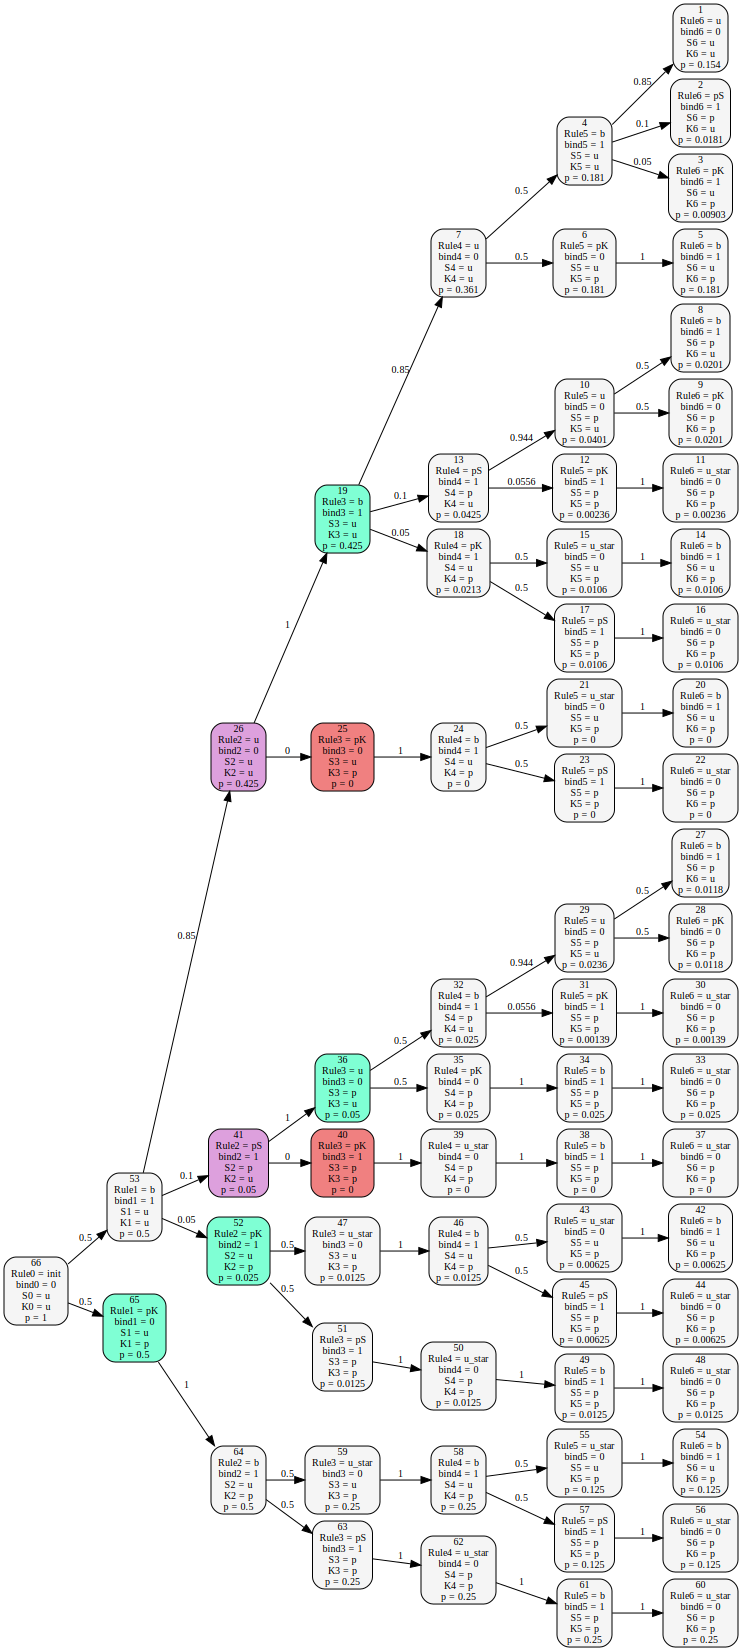

In [23]:
interventional_trace = kappa.do(~pK3)
display(interventional_trace.show(show_prob=True,
                cut=~pK3,
                crit=kappa.critical(~pK3),
                show_id=True
               ))

# Counterfactual trace

$$P(Rule_{4,do(Rule_{3}=\lnot pK)} = pS|Rule_{0}=init,Rule_1=b,Rule_2=u,Rule_3=pK, Rule_4=pS, Rule_5=u^\ast)$$

In [8]:
counterfactual_trace = kappa.cf(factual_trace, ~pK3)

![Prevention graph](../images/Prevention-graph.png)


## Counterfactual tree

![counterfactual](../images/counterfactualtree.png)

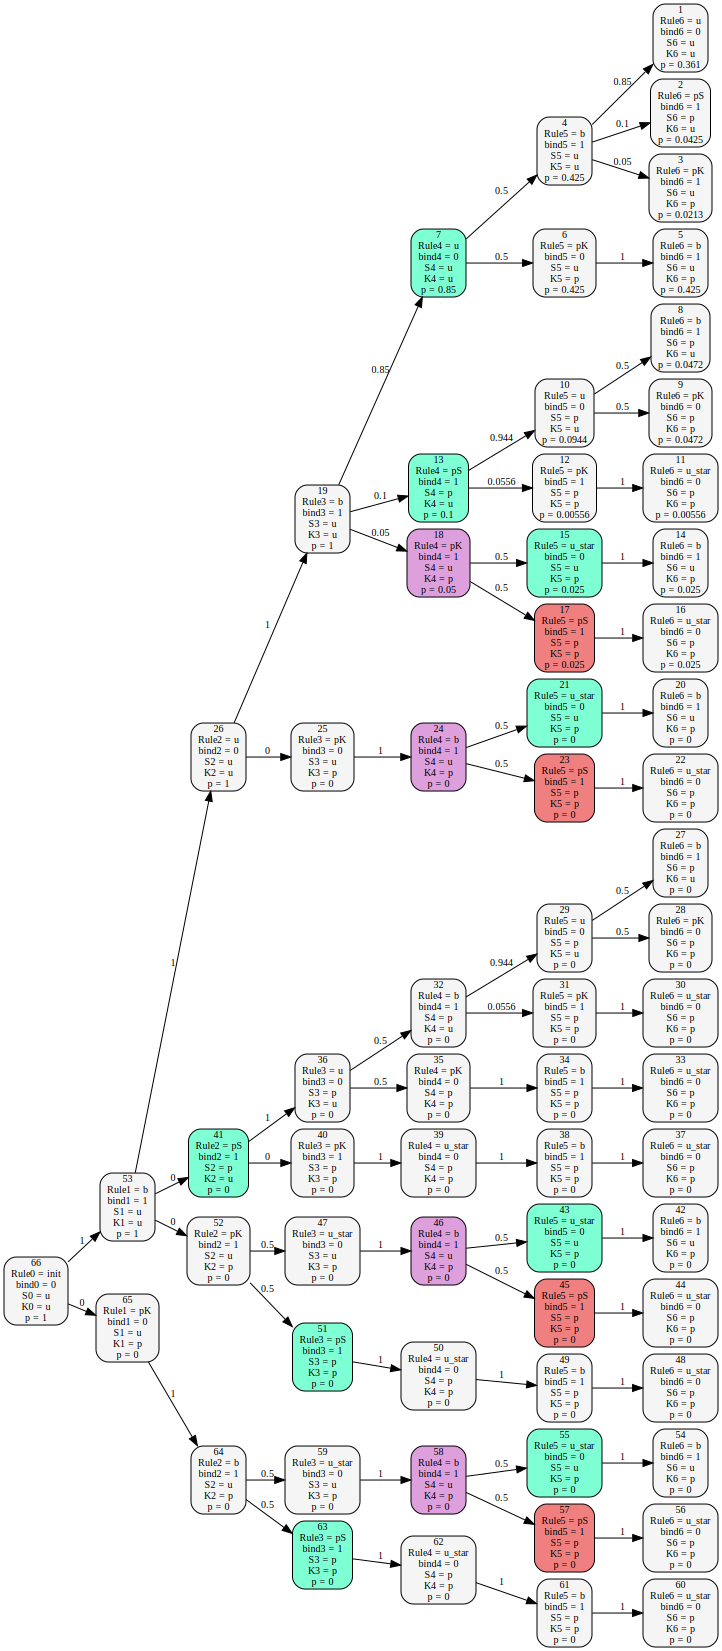

In [9]:
init_enables_pK = ((kappa.prop('Rule0=init') < kappa.prop('Rule1=pK')) | 
                  (kappa.prop('Rule0=init') < kappa.prop('Rule2=pK')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule3=pK')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule4=pK')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule5=pK')) |
                  (kappa.prop('Rule0=init') < kappa.prop('Rule6=pK')))

pK1, pK2, pK3, pK4, pK5 = (kappa.prop('Rule1=pK'), 
                           kappa.prop('Rule2=pK'), 
                           kappa.prop('Rule3=pK'), 
                           kappa.prop('Rule4=pK'),
                           kappa.prop('Rule5=pK'))
u2, u3, u4, u5, u6 = (kappa.prop('Rule2=b'),
                      kappa.prop('Rule3=u'),
                      kappa.prop('Rule4=u'),
                      kappa.prop('Rule5=u'),
                      kappa.prop('Rule6=u')
                     )

pS3, pS4, pS5, pS6 = (kappa.prop('Rule3=pS'),
                  kappa.prop('Rule4=pS'),
                  kappa.prop('Rule5=pS'),
                  kappa.prop('Rule6=pS'))

not_pK3_enables_u = (~pK3 < u4) | (~pK3 < u5) | (~pK3 < u6) 
                           
pK3_prevents_u = ~not_pK3_enables_u

not_u2_enables_pS = (~u2 < pS3) | (~u2 < pS4 ) | (~u2 < pS5) | (~u2 < pS6)
not_u3_enables_pS =  (~u3 < pS4 ) | (~u3 < pS5) | (~u3 < pS6)
not_u4_enables_pS =  (~u4 < pS5) | (~u4 < pS6)
not_u5_enables_pS = ~u5 < pS6

not_u_enables_pS = not_u2_enables_pS | not_u3_enables_pS | not_u4_enables_pS | not_u5_enables_pS

u_prevents_pS = ~not_u_enables_pS

u4_prevents_pS = ~not_u4_enables_pS
display(counterfactual_trace.show(show_prob=True,
                cut=u4_prevents_pS,
                crit=kappa.critical(u4_prevents_pS),
                show_id=True
               ))